In [52]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from src.utils import load_data_and_metadata

In [53]:
FILE_DIR = "C:\\Users\\jc269556\\Documents\\Fermionic-bosonic-qubit\\"
file_path = "FB_W4_S8_20231002_151301"
data, metadata = load_data_and_metadata(FILE_DIR + file_path + ".hdf5")

In [54]:
data.keys()
freqs=data['frequency_array']
mags=data['magnitude_array']
phase=data['phase_array']
power=data['power_array']

#converting dBm -> V (with R= 50 Ohm)
Amp = 0.05*10**(mags/20)


[-65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48
 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30]


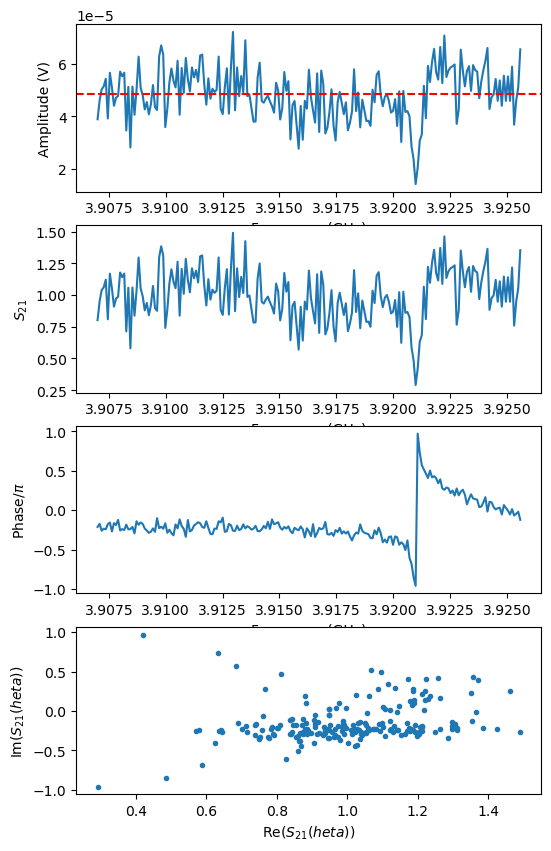

In [55]:
print(power)
i=10

%matplotlib inline
fig,ax = plt.subplots(4,1,figsize = (6,10))#, sharey=True)
ax[0].plot(freqs,Amp[i])
ax[0].axhline(y=Amp[i].mean(), color='r', linestyle='--')
ax[0].set_ylabel('Amplitude (V)')
ax[0].set_xlabel('Frequency (GHz)')

ax[1].plot(freqs,Amp[i]/Amp[i].mean())
ax[1].set_ylabel('$S_{21}$')
ax[1].set_xlabel('Frequency (GHz)')

ax[2].plot(freqs,phase[i]/180)
ax[2].set_ylabel('Arg($S_{21}$)/$\pi$')
ax[2].set_xlabel('Frequency (GHz)')

ax[3].plot(Amp[i]/Amp[i].mean(),phase[i]/180,'.')
ax[3].set_xlabel('Re($S_{11}(\theta $))')
ax[3].set_ylabel('Im($S_{11}(\theta $))')
plt.show()


0.5729632945389436

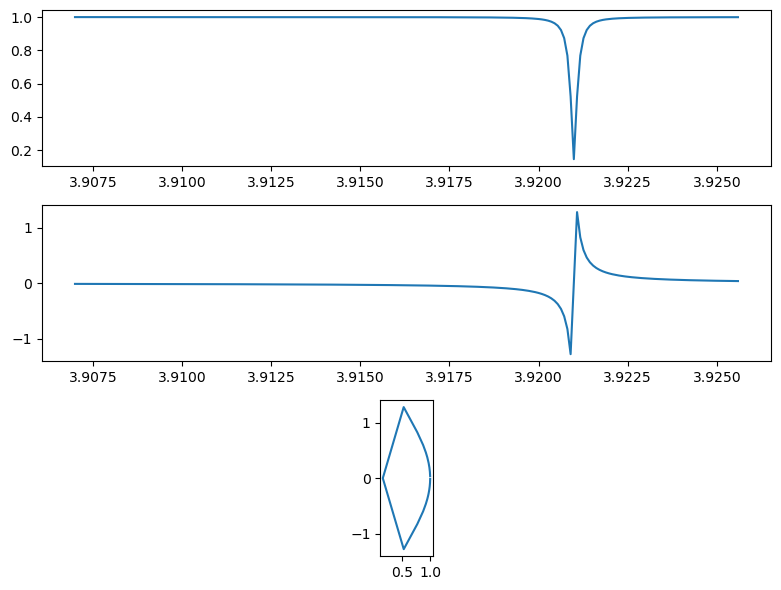

In [83]:
# Usando theta

w0 = freqs[np.argmin(Amp[i])]
Q = 1.28e04
Qext = 2.234e4
a = Q/Qext

# def imag(w,Q,Qext):
#     y = (w-w0)/w0
#     th = -2*np.arctan(2*Q*y)
#     return -Q*np.sin(th)/Qext

# def real(w,Q,Qext):
#     y = (w-w0)/w0
#     th = -2*np.arctan(2*Q*y)
#     return 1 - (Q/Qext)*(1 + np.cos(th))

def amp(w,a,Q):
    y = (w-w0)/w0
    return np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2))

def arg(w,a,Q):
    y = (w-w0)/w0
    return np.arctan(4*a*Q*y/(1+4*Q**2*y**2-2*a))

fig, ax = plt.subplots(3,1,figsize = (8,6))#, sharex=True)

ax[0].plot(freqs,amp(freqs,a,Q))
ax[1].plot(freqs,arg(freqs,a,Q))
ax[2].plot(amp(freqs,a,Q),arg(freqs,a,Q))
ax[2].set_aspect('equal')
plt.tight_layout()
a

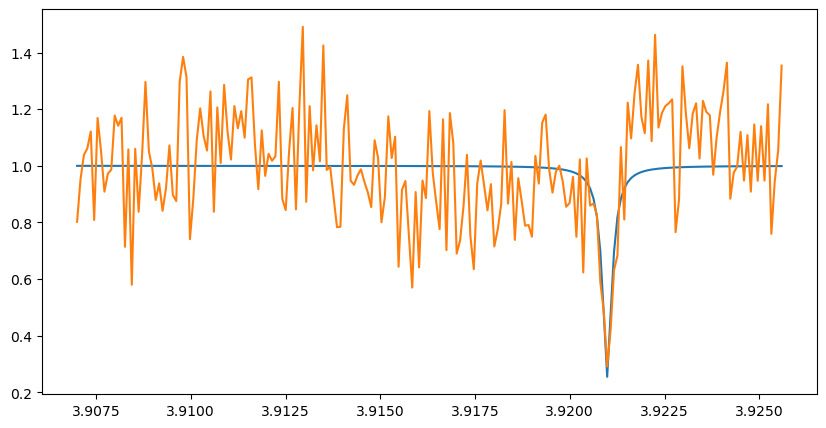

Q, Qext= [6.27596425e-01 9.84154564e+03] with errors 0.08454532970514618,2484.0743780297194


In [85]:
# fitting amplitude
popt, pcov = curve_fit(amp, freqs, Amp[i]/Amp[i].mean(), p0 = [0.5,10000])
fig, ax = plt.subplots(1,1,figsize = (10,5), sharey=True)
ax.plot(freqs,amp(freqs,popt[0],popt[1])) 
ax.plot(freqs,Amp[i]/Amp[i].mean())
plt.show()

print(f'Q, Qext= {popt} with errors {np.sqrt(pcov[0,0])},{np.sqrt(pcov[1,1])}')

In [87]:
# Fitting phase between -180 and 180
w0 = freqs[np.argmin(Amp[i])]

popt, pcov = curve_fit(arg, freqs, phase[i], p0 = [0.5,10000])
fig, ax = plt.subplots(1,1)
ax.plot(freqs,arg(freqs,popt[0],popt[1]))  # normalized
ax.plot(freqs,phase[i])
plt.show()

print(f'Q, Qext = {popt} with error {np.sqrt(pcov[0,0])},{np.sqrt(pcov[1,1])}')

C:\Users\jc269556\AppData\Local\Temp\ipykernel_20156\213033183.py:24: RuntimeWarning: invalid value encountered in divide
  return np.arctan(4*a*Q*y/(1+4*Q**2*y**2-2*a))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.